** The Plot script for all optimizers and comparisons **

In [2]:
import os, pickle
%matplotlib notebook
import matplotlib.pyplot as plt
import torch
import numpy as np

In [1]:
def get_curve_data(optimizer, dataset, model, path):
    folder_path = os.path.join("./curves", path)
    model_name = "{}-{}-{}".format(optimizer, dataset, model)
    file_path = os.path.join(folder_path, model_name)
    #return {key: torch.load(fp) for key, fp in zip(keys, paths)}
    with open(file_path, "rb") as f:
        return pickle.load(f)

In [3]:
def figure_title(curve_type, curve_metric, model, dataset):
    if curve_metric == 'acc':
        curve_metric = 'accuracy'
    elif curve_metric == 'f1':
        curve_metric = 'f1'
    if model == 'lstm':
        model = 'LSTM-Att'
        
    title = '{} {} for {} on {}'.format(curve_type.capitalize(), curve_metric.capitalize(), model, dataset.upper())
    return title
    

In [7]:
def plot(model, dataset, optimizers=None, curve_type='test', curve_metric="acc", path='', loc='upper'):
    assert model in ['lstm', 'resnet', 'bert'], 'Invalid model name: {}'.format(model)
    assert curve_type in ['train', 'test'], 'Invalid curve type: {}'.format(curve_type)
    
    plt.figure()
    curve_metric_cap = curve_metric
    title = figure_title(curve_type, curve_metric, model, dataset)
    plt.title(title)
    plt.xlabel('Iterations')
    curve_metric_cap = curve_metric
    if curve_metric_cap == 'acc':
        curve_metric_cap = 'accuracy'
    if curve_type == 'test':
        plt.ylabel('{} {} %'.format(curve_type.capitalize(), curve_metric_cap.capitalize()))
    else:
        plt.ylabel('{} {}'.format(curve_type.capitalize(), curve_metric_cap.capitalize()))

        
    if "loss" in curve_metric:
        plt.ylim(0, 2.0)
    elif "acc" in curve_metric:
        plt.ylim(30, 100)
    elif 'f1' in curve_metric:
        plt.ylim(30,100)
    for optim in optimizers:
        linestyle = '--' if 'clip' in optim else '-'
        #linestyle = '-'
        curve_data = get_curve_data(optim, dataset=dataset, model=model,path=path)
        # print ('{}_{}'.format(curve_type, curve_metric), curve_data['{}_{}'.format(curve_type, curve_metric)])
        accuracies = np.array(curve_data['{}_{}'.format(curve_type, curve_metric)][:15])
        x_label = [i * 10 for i in range(len(accuracies))]
        plt.plot(x_label, accuracies, label=optim, ls=linestyle,lw=3)

    plt.grid(ls='--')
    if loc=='upper':
        plt.legend()
    else:
        plt.legend( loc='lower right')
    plt.show()
    #plt.savefig('./curves/' + path + '/' + dataset + '-' +curve_type + '-' + curve_metric)

<IPython.core.display.Javascript object>


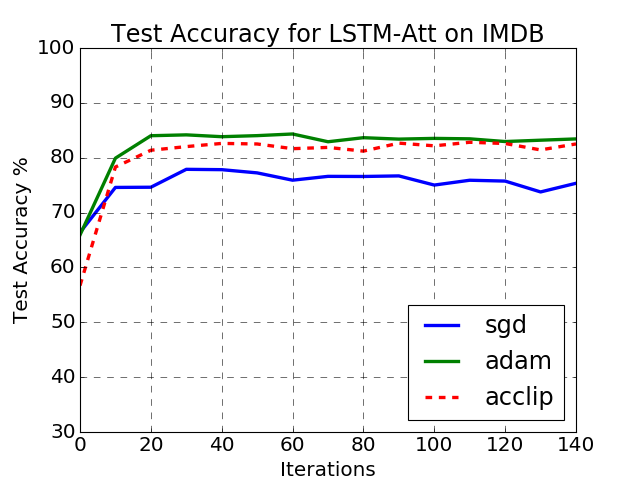

<IPython.core.display.Javascript object>


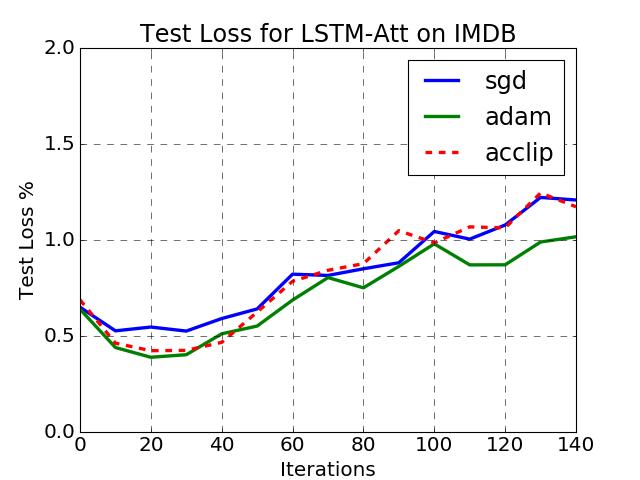

<IPython.core.display.Javascript object>


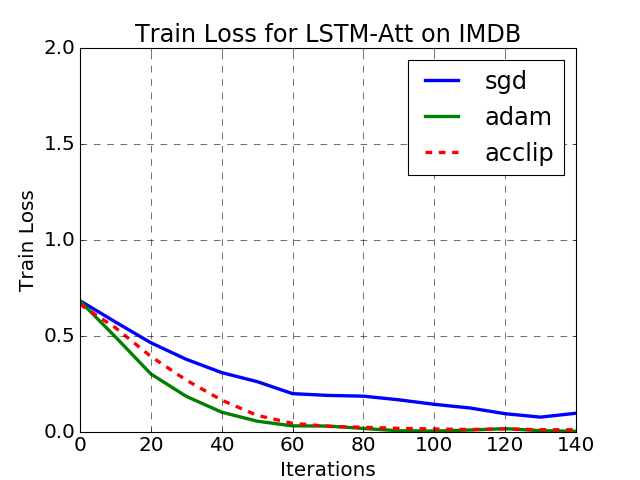

In [166]:
optim_list = ['sgd', 'adam', 'acclip']
plot(model='lstm', dataset='imdb', optimizers=optim_list, curve_type='test', curve_metric='acc',path='imdb-curves', loc='lower')
plot(model='lstm', dataset='imdb', optimizers=optim_list, curve_type='test', curve_metric='loss',path='imdb-curves')
plot(model='lstm', dataset='imdb', optimizers=optim_list, curve_type='train', curve_metric='loss',path='imdb-curves')

<IPython.core.display.Javascript object>


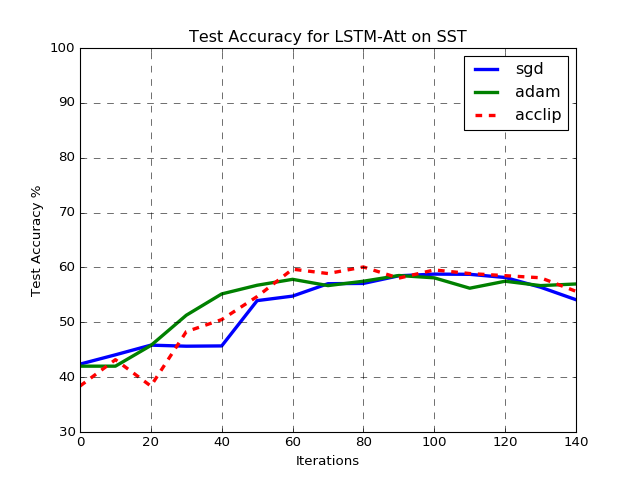

<IPython.core.display.Javascript object>


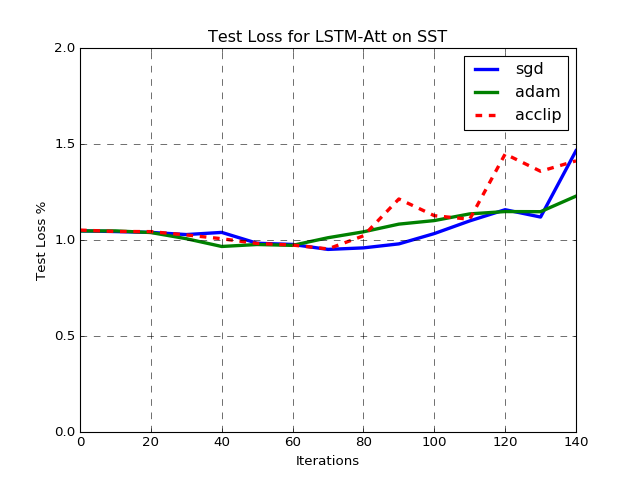

<IPython.core.display.Javascript object>


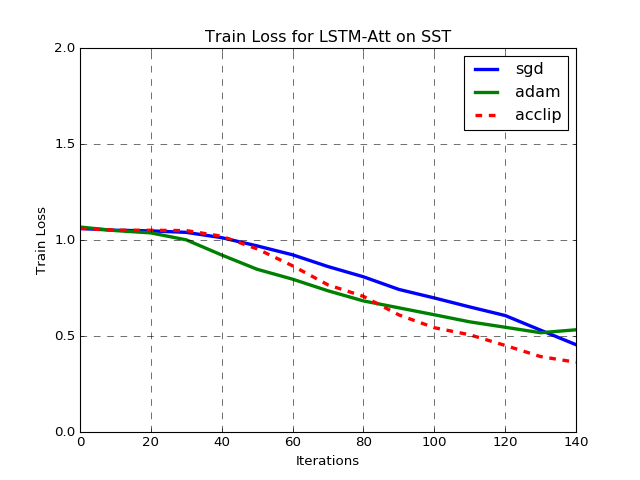

In [8]:
optim_list = ['sgd', 'adam', 'acclip']
plot(model='lstm', dataset='sst', optimizers=optim_list, curve_type='test', curve_metric='acc',path='sst-curves')
plot(model='lstm', dataset='sst', optimizers=optim_list, curve_type='test', curve_metric='loss',path='sst-curves')
plot(model='lstm', dataset='sst', optimizers=optim_list, curve_type='train', curve_metric='loss',path='sst-curves')

<IPython.core.display.Javascript object>


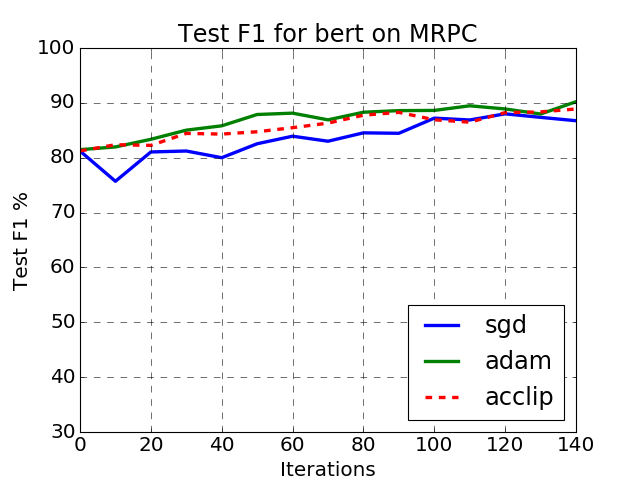

<IPython.core.display.Javascript object>


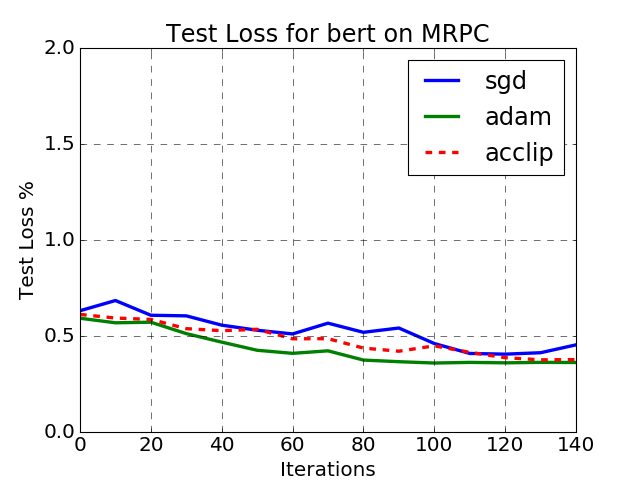

<IPython.core.display.Javascript object>


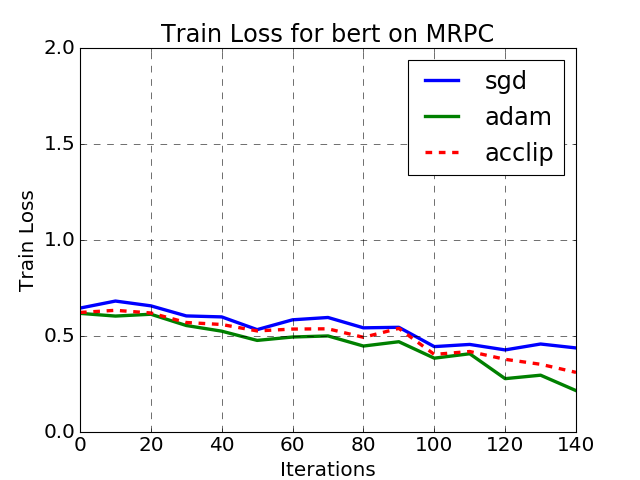

In [168]:
optim_list = ['sgd','adam', 'acclip']
#optim_list = ['adam-lr=2e-5', 'adam-lr=5e-5']
plot(model='bert', dataset='mrpc', optimizers=optim_list, curve_type='test', curve_metric='f1',path='mrpc-curves',loc='lower')
plot(model='bert', dataset='mrpc', optimizers=optim_list, curve_type='test', curve_metric='loss',path='mrpc-curves')
plot(model='bert', dataset='mrpc', optimizers=optim_list, curve_type='train', curve_metric='loss',path='mrpc-curves')


In [169]:
def plot_squad(model, dataset, optimizers=None, curve_type='test', curve_metric="f1", path='', loc='upper'):
    assert model in ['lstm', 'resnet', 'bert'], 'Invalid model name: {}'.format(model)
    assert curve_type in ['train', 'test'], 'Invalid curve type: {}'.format(curve_type)
    
    plt.figure()
    #plt.title('{} {} for {}-{}'.format(curve_type.capitalize(), curve_metric.capitalize(), model, dataset))
    plt.xlabel('Iterations')
    if curve_type =='test':
        plt.ylabel('{} {} %'.format(curve_type.capitalize(), curve_metric.capitalize()))
    else:
        plt.ylabel('{} {}'.format(curve_type.capitalize(), curve_metric.capitalize()))



    for optim in optimizers:
        linestyle = '--' if 'clip' in optim else '-'
        curve_data = get_curve_data(optim, dataset=dataset, model=model,path=path)
#         print (optim, curve_data)
#         print ('{}_{}'.format(curve_type, curve_metric), curve_data['{}_{}'.format(curve_type, curve_metric)])
        if 'acclip' in optim:
            data = np.array(curve_data['{}_{}'.format(curve_type, curve_metric)])
            idx = [i for i in range(data.size) if i % 2 ==1]
            data = data[idx]
        else:
            data = np.array(curve_data['{}_{}'.format(curve_type, curve_metric)])
        if curve_type == 'test':
            plt.plot(data/100, label=optim, ls=linestyle, lw=5)
        else:
            plt.plot(data, label=optim, ls=linestyle, lw=5)
            
            
        
    plt.grid(ls='--')
    if loc == 'upper':
        plt.legend()
    else:
        plt.legend(loc='lower right')
    plt.show()
    #plt.savefig('./curves/' + path + '/' + dataset + '-' +curve_type + '-' + curve_metric)

<IPython.core.display.Javascript object>


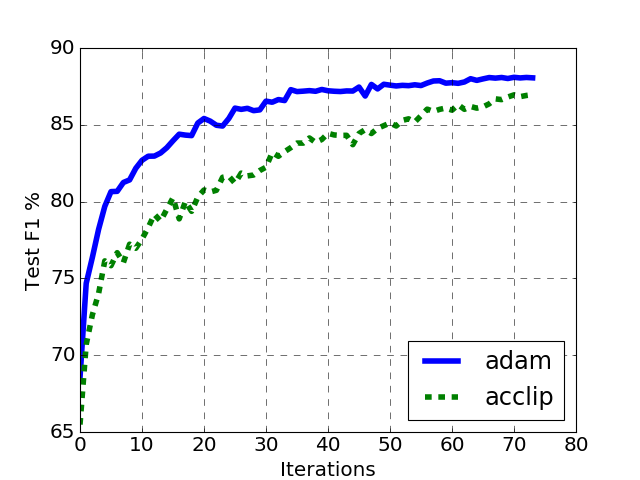

<IPython.core.display.Javascript object>


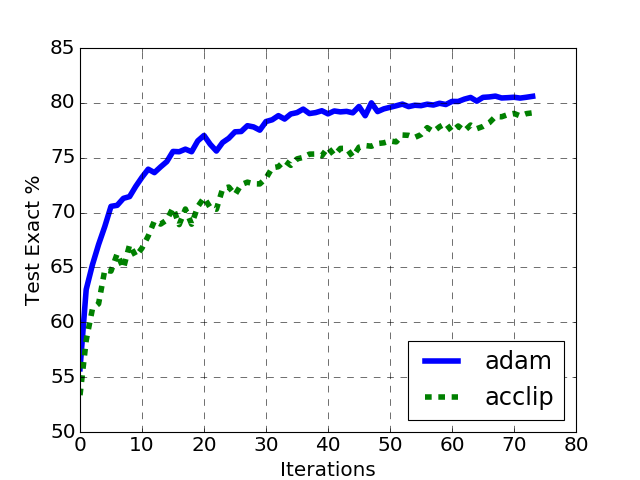

<IPython.core.display.Javascript object>


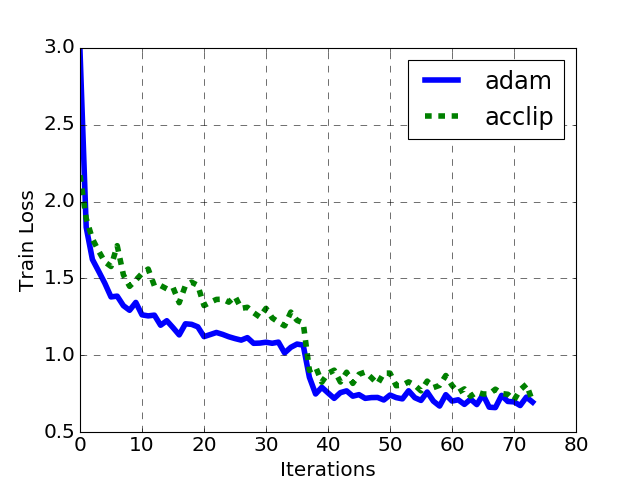

In [170]:
optim_list = ['adam','acclip']
plot_squad(model='bert', dataset='squad', optimizers=optim_list, curve_type='test', curve_metric='f1',path='squad-curves',loc='lower')
plot_squad(model='bert', dataset='squad', optimizers=optim_list, curve_type='test', curve_metric='exact',path='squad-curves',loc='lower')
plot_squad(model='bert', dataset='squad', optimizers=optim_list, curve_type='train', curve_metric='loss',path='squad-curves')